<a href="https://colab.research.google.com/github/rhapis97/Practice_AI/blob/main/210630_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext tensorboard

import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
num_classes = 2   # 2개( 개, 고양이 )

class Alexnet(Sequential): 
  def __init__(self, input_shape, num_classes): 
    super().__init__()
    
    self.add(Conv2D(96, kernel_size=(11,11), strides=4,
                    padding = 'valid', activation='relu',
                    input_shape = input_shape, 
                    kernel_initializer = 'he_normal'))
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),
                          padding='valid', data_format=None))
    #  data format default : channels_last (배치크기, 높이, 너비, 채널 수)

    self.add(Conv2D(256, kernel_size=(5,5), strides=1, 
                    padding='same', activation='relu',
                    kernel_initializer='he_normal'))
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),
                          padding='valid', data_format=None))
    

    self.add(Conv2D(384, kernel_size=(3,3), strides=1, 
                    padding='same', activation='relu',
                    kernel_initializer='he_normal'))
  
    self.add(Conv2D(384, kernel_size=(3,3), strides=1, 
                    padding='same', activation='relu',
                    kernel_initializer='he_normal'))
 
    self.add(Conv2D(256, kernel_size=(3,3), strides=1, 
                    padding='same', activation='relu',
                    kernel_initializer='he_normal'))
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),
                     padding='valid', data_format=None))
    
    self.add(Flatten()) # 3차원 >> 1차원 
    self.add(Dense(4096, activation='relu'))
    self.add(Dense(4096, activation='relu'))
    self.add(Dense(1000, activation='relu'))
    self.add(Dense(num_classes, activation='softmax'))

    self.compile(optimizer =tf.keras.optimizers.Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [3]:
model = Alexnet((100,100,3), num_classes)
model.summary()

Model: "alexnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)         8849

In [4]:
EPOCHS = 100
BATCH_SIZE = 332
image_height = 100
image_width = 100
train_dir = 'train/'
valid_dir = 'validation/'

In [5]:
from google.colab import files
file_uploaded = files.upload()
# train_dir = 'catanddog.zip'
!unzip catanddog.zip

Saving catanddog.zip to catanddog.zip
Archive:  catanddog.zip
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/10.jpg        
  inflating: train/Cat/11.jpg        
  inflating: train/Cat/12.jpg        
  inflating: train/Cat/13.jpg        
  inflating: train/Cat/14.jpg        
  inflating: train/Cat/15.jpg        
  inflating: train/Cat/16.jpg        
  inflating: train/Cat/17.jpg        
  inflating: train/Cat/18.jpg        
  inflating: train/Cat/19.jpg        
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/20.jpg        
  inflating: train/Cat/21.jpg        
  inflating: train/Cat/22.jpg        
  inflating: train/Cat/23.jpg        
  inflating: train/Cat/24.jpg        
  inflating: train/Cat/25.jpg        
  inflating: train/Cat/26.jpg        
  inflating: train/Cat/27.jpg        
  inflating: train/Cat/28.jpg        
  inflating: train/Cat/29.jpg        
  inflating: train/Cat/3.jpg         
  inflating: train/Cat/30.

In [7]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [8]:
# 모델 학습
model.fit(train_generator, 
          epochs = EPOCHS, 
          steps_per_epoch=train_num // BATCH_SIZE,
          validation_data = valid_generator,
          validation_steps = valid_num // BATCH_SIZE,
          verbose=1)

Epoch 1/100
1/1 [==============================] - 33s 33s/step - loss: 0.6895 - accuracy: 0.5472
Epoch 2/100
1/1 [==============================] - 5s 5s/step - loss: 37.4561 - accuracy: 0.4578
Epoch 3/100
1/1 [==============================] - 0s 319ms/step - loss: 4.3575 - accuracy: 0.4717
Epoch 4/100
1/1 [==============================] - 0s 343ms/step - loss: 0.8044 - accuracy: 0.4151
Epoch 5/100
1/1 [==============================] - 0s 335ms/step - loss: 0.7417 - accuracy: 0.4340
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.6958 - accuracy: 0.4880
Epoch 7/100
1/1 [==============================] - 0s 311ms/step - loss: 0.6926 - accuracy: 0.5094
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 0.6896 - accuracy: 0.5301
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 0.6886 - accuracy: 0.5241
Epoch 10/100
1/1 [==============================] - 2s 2s/step - loss: 0.6873 - accuracy: 0.5813
Epoch 11/100
1/1 [======

In [9]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict_classes(validation)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


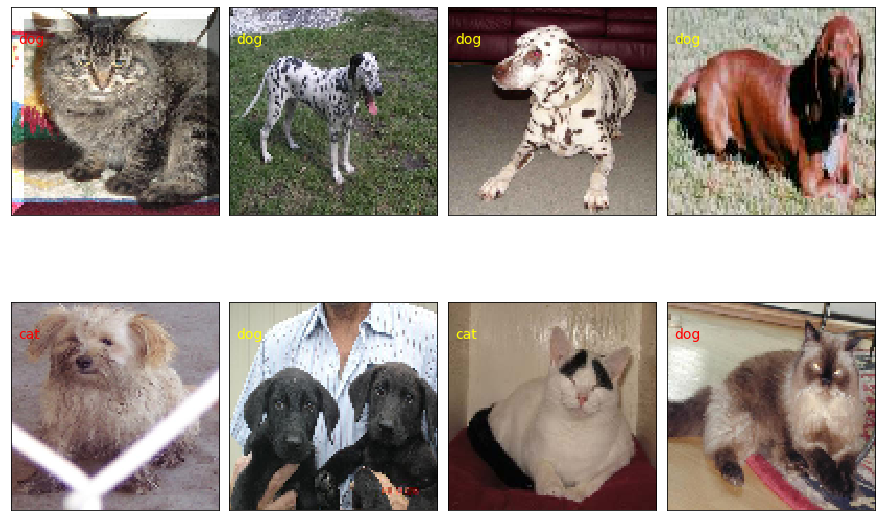

In [11]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
  ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
  ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')

  # 올바른 예측: 노란색, 잘못된 예측: 빨간색
  if prediction_values[i] == np.argmax(label_batch[i]):
    ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
  else:
    ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)